# Assignment 3 - Building a Custom Visualization

---

### other plots in this notebook:
* **plot_histogram()**
* **simple_plot()**
* **animated_plot()**

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from matplotlib.cm import ScalarMappable

import scipy.stats as st
import numpy as np
import pandas as pd

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=["1992","1993","1994","1995"])

summary = df.T.loc[df.T.index].describe()

summary.loc["std"] = summary.loc["std"]/np.sqrt(summary.loc["count"]) 
summary

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,3320.866311,1628.701180,2323.419534,1155.026400
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [2]:
def plot_histograms():
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot()
    plt.boxplot([df.T["1992"], df.T["1993"], df.T["1994"], df.T["1995"]], whis=1.5)
    plt.show()
    
#plot_histograms()

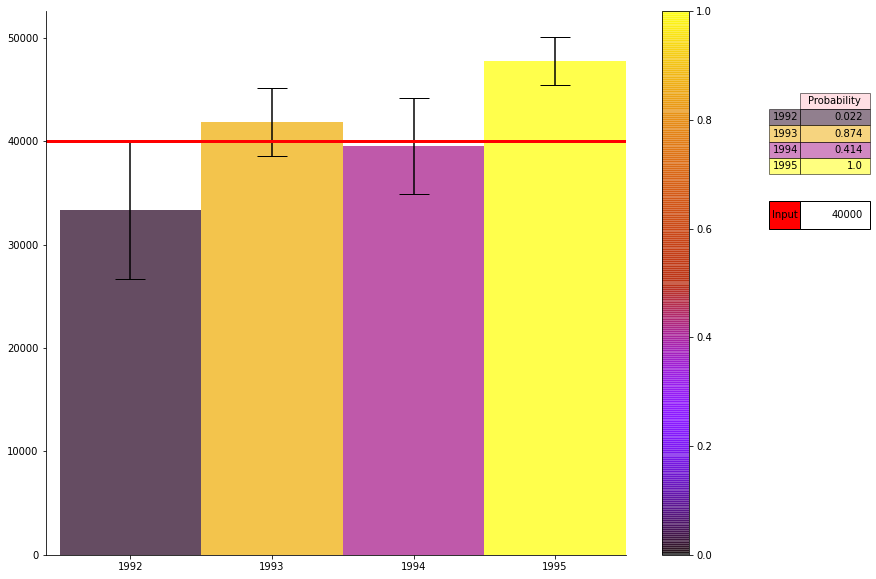

array([[1.40028008e-01, 7.53857868e-06, 1.22888291e-01, 1.00000000e+00],
       [9.35152289e-01, 6.68796587e-01, 0.00000000e+00, 1.00000000e+00],
       [6.41688948e-01, 6.98147771e-02, 5.26432163e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [126]:
def simple_plot(yinput):
    
    fig = plt.figure(figsize=(13,10))
    ax = plt.subplot()
    
    #constants
    width = 1
    xlabel = [str(i) for i in range(1992,1996)]
    
    #format the data
    x = range(1,5)
    y = [summary[item]["mean"] for item in xlabel]
    yerr = [2*summary[item]["std"] for item in xlabel]
    summary.loc["z"] = (yinput-summary.loc["mean"])/ summary.loc["std"]
    sum2 = summary.T
    sum2['prob'] = sum2['z'].apply(lambda x: 1-st.norm.cdf(x))

    #Colormap
    my_cmap = plt.cm.get_cmap('gnuplot')
    bar_cols = my_cmap(sum2["prob"])
    sm = ScalarMappable(cmap=my_cmap )
    sm.set_array([])
    
    #Plotting
    plot = ax.bar(x,y, yerr=yerr, color=bar_cols, width=1, label=xlabel, capsize=15, alpha=0.7)
    line = ax.axhline(yinput, lw=3, color="red")
    cbar = plt.colorbar(sm, alpha=0.7)
        
    #adjusting the axis
    ax.set_xlim([0.4,4.5])
    ax.set_xticks(x)
    ax.set_xticklabels(xlabel)
    ax.tick_params(which="both",bottom='off', labelleft='off', labelbottom='on')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    #Probability Table
    probs = [[i] for i in round(sum2["prob"], 3)]
    p_table = ax.table(cellText=probs, colLabels=["Probability"],
                         rowLabels=xlabel, bbox=[1.3, .7, .12, .15],
                         rowColours=bar_cols, colColours=["Pink"],
                         cellColours=[[i] for i in bar_cols])
    for cell in p_table._cells:
        p_table._cells[cell].set_alpha(.5)      
        
    #User Input Table
    input_t = ax.table(cellText=[[yinput]], bbox=[1.3, .6, .12, .05],
                       rowLabels=["Input"], rowColours=["red"])
    
    plt.show()
    return bar_cols
    
simple_plot(40000)